# Import and Install

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Uninstall the current version of pandas
!pip uninstall -y pandas

# Install pandas version 1.3.5
!pip install pandas==1.3.5

# Import pandas and print the version to confirm the installation
import pandas as pd
print(f"Installed pandas version: {pd.__version__}")

!pip install natsort plotly matplotlib scikit-learn seaborn imageio wandb google-cloud-bigquery


Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 50.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.
Installed pandas version: 1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import logging
from IPython.display import display, HTML
import sys
import os
from joblib import dump
from sklearn import tree
import google.colab.data_table
import importlib.util
import time
import gc
import glob
import matplotlib.pyplot as plt

In [4]:
!pip install /content/drive/My\ Drive/ML_Nuclear_Data/nucml-1.0.5-dev.1/nucml-1.0.5-dev.1
!pip install git+https://github.com/tensorflow/docs
!pip install tensorflow xgboost
!python -c "import nucml.configure as config; config.configure('.', 'acedata/', matlab_exe_path='/mnt/c/Program\ Files/MATLAB/R2019a/bin/matlab.exe')"

Processing ./drive/My Drive/ML_Nuclear_Data/nucml-1.0.5-dev.1/nucml-1.0.5-dev.1
  Preparing metadata (setup.py) ... done
  Created wheel for nucml: filename=nucml-1.0.5.dev1-py3-none-any.whl size=255178 sha256=046aa0445fa11d4f2f97a5e7101ecaebaa6f586c7a809b44003511a71bec97d6
  Stored in directory: /root/.cache/pip/wheels/84/d4/b6/c694cba4d407d574476552aab353f8a7cd263211ebb48723ff
Successfully built nucml
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-xjerk85y
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-xjerk85y
  Resolved https://github.com/tensorflow/docs to commit 773bcc865af5d5a45b405c80faf6fcc3cc510d7d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.7.15.51478-py3-none-any.whl size=182587 sha256=f031f9890f00e815807a17ab830e0fdc33d859a522e4e1f887130c42c45a0548
  Stored in directory: /tmp/pip-ephem-wheel-cache-vvyccxor/wheels/86/0f/1e/3b62293

In [5]:
# Loading the modules for further use if needed
import nucml.ace.data_utilities as ace_utils              # pylint: disable=import-error
import nucml.evaluation.data_utilities as endf_utils      # pylint: disable=import-error
import nucml.datasets as nuc_data                         # pylint: disable=import-error
import nucml.model.utilities as model_utils               # pylint: disable=import-error
import nucml.plot.utilities as plot_utils                 # pylint: disable=import-error
import nucml.general_utilities as gen_utils               # pylint: disable=import-error
import nucml.exfor.plot as exfor_plot_utils               # pylint: disable=import-error
import nucml.config as config                             # pylint: disable=import-error
import nucml.exfor.data_utilities as exfor_utils


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/conte

# Load in

# Load in V2

## Definitions

In [6]:
import joblib
def find_csv_file(directory):
    for filename in os.listdir(directory):
        if filename.startswith("all_results") and filename.endswith(".csv"):
            return os.path.join(directory, filename)
    return None

def load_and_combine_data(model_date, base_directory):
    # Construct the directory path
    directory_path = f'{base_directory}/{model_date}'
    print(directory_path)  # For verification

    # List folders in directory function
    def list_folders_in_directory(directory_path):
        try:
            # List all items in the directory
            items = os.listdir(directory_path)
            # Filter out only folders
            folders = [item for item in items if os.path.isdir(os.path.join(directory_path, item))]
            # Extract relevant labels from folder names
            folder_labels = [folder.split('_log')[0] for folder in folders]

            # Print each folder and its extracted label
            print(f"Folders in '{directory_path}':")
            for folder, label in zip(folders, folder_labels):
                print(f"{folder} -> {label}")

            return folders, folder_labels
        except Exception as e:
            print(f"An error occurred: {e}")
            return [], []

    # Call the function and get the labels
    folders, folder_labels = list_folders_in_directory(directory_path)
    print(f"Extracted folder labels: {folder_labels}")

    # Initialize an empty list to hold all dataframes
    all_dataframes = []

    # Initialize an index counter
    unique_index = 0

    # Load CSV files from each folder, add a 'source' column, and append to the list
    for folder, label in zip(folders, folder_labels):
        folder_path = os.path.join(directory_path, folder)
        csv_path = find_csv_file(folder_path)
        if csv_path:
            try:
                dfm = pd.read_csv(csv_path).sort_values(by="max_depth")
                dfm.insert(0, 'source', label)  # Insert 'source' column as the first column
                dfm.insert(0, 'unique_index', range(unique_index, unique_index + len(dfm)))  # Add unique index
                unique_index += len(dfm)
                all_dataframes.append(dfm)  # Append dataframe to the list
                print(f"Loaded CSV for {label} with shape: {dfm.shape}")
            except Exception as e:
                print(f"An error occurred while reading CSV for {label}: {e}")
        else:
            print(f"CSV file not found for {label} with pattern 'all_results'")

    # Concatenate all dataframes into a single dataframe
    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        print(f"Combined DataFrame shape: {combined_df.shape}")
    else:
        combined_df = pd.DataFrame()
        print("No dataframes to combine.")

    # Update paths in the dataframe
    def update_paths(row, model_date):
        row['model_path'] = row['model_path'].replace('/ML_Saving_Directory/', f'/ML_Saving_Directory/{model_date}/')
        row['scaler_path'] = row['scaler_path'].replace('/ML_Saving_Directory/', f'/ML_Saving_Directory/{model_date}/')
        return row

    combined_df = combined_df.apply(update_paths, axis=1, model_date=model_date)

    return combined_df

def load_model_and_scaler_from_index(index, combined_df, model_date, base_directory):
    # Locate the corresponding row in the dataframe using the unique index
    try:
        row = combined_df[combined_df['unique_index'] == index].iloc[0]
    except IndexError:
        raise ValueError("No matching row found in the dataframe for the given unique index.")

    # Extract model and scaler paths from the row
    model_path = row['model_path']
    scaler_path = row['scaler_path']
    source = row['source']

    # Load the model and scaler
    model = joblib.load(model_path)
    scalerM = joblib.load(scaler_path)

    # Filter the combined dataframe to get only the rows associated with the selected model
    dfm = combined_df[combined_df['unique_index'] == index].copy()

    # Keep only the last 19 columns of the dataframe
    dfm = dfm.iloc[:, -19:]

    return model, scalerM, dfm

# Function to save combined DataFrame to CSV
def save_combined_df_to_csv(df, model_date, base_directory):
    # Define the save directory
    save_dir = os.path.join(base_directory, model_date,)
    # Create the directory if it does not exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # Define the path for saving the CSV
    csv_path = os.path.join(save_dir, 'combined_df.csv')
    # Save the DataFrame to CSV
    df.to_csv(csv_path, index=False)
    print(f"Combined DataFrame saved to {csv_path}")


In [7]:
# To display the HTML table in Jupyter Notebook or Colab
from IPython.core.display import HTML

def generate_html_table(combined_df):
    # Generate the HTML table with DataTables script for filtering
    html_table = combined_df.to_html(index=False, classes='table table-striped', table_id='data_table')
    html_script = """
    <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
    <script src="https://cdn.datatables.net/1.11.4/js/jquery.dataTables.min.js"></script>
    <link rel="stylesheet" href="https://cdn.datatables.net/1.11.4/css/jquery.dataTables.min.css"/>
    <script>
        $(document).ready(function() {
            $('#data_table').DataTable({
                scrollX: true,
                autoWidth: true,
                columnDefs: [
                    { width: '20%', targets: 0 }
                ]
            });
        });
    </script>
    """
    full_html = html_script + html_table
    return full_html



## Loading

In [8]:
# Example usage
model_date = '18.07.24'
base_directory = '/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory'
combined_df = load_and_combine_data(model_date, base_directory)

# Save combined DataFrame to CSV
save_combined_df_to_csv(combined_df, model_date, base_directory)

# Generate HTML table from combined dataframe
html_table = generate_html_table(combined_df)
HTML(html_table)

/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24
Folders in '/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24':
All_basic=3_neutrons -> All_basic=3_neutrons
LimitedRows=20000_basic=3_neutrons -> LimitedRows=20000_basic=3_neutrons
Fraction=0.6_basic=3_neutrons -> Fraction=0.6_basic=3_neutrons
figures -> figures
Extracted folder labels: ['All_basic=3_neutrons', 'LimitedRows=20000_basic=3_neutrons', 'Fraction=0.6_basic=3_neutrons', 'figures']
Loaded CSV for All_basic=3_neutrons with shape: (36, 21)
Loaded CSV for LimitedRows=20000_basic=3_neutrons with shape: (36, 21)
Loaded CSV for Fraction=0.6_basic=3_neutrons with shape: (36, 21)
CSV file not found for figures with pattern 'all_results'
Combined DataFrame shape: (108, 21)
Combined DataFrame saved to /content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/combined_df.csv


unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,train_r2,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
0,All_basic=3_neutrons,1,70,6,6,standard_scaler,0.091906,0.036086,0.951924,0.951924,0.120001,0.058499,0.922468,0.922468,0.119630,0.058752,0.921677,0.921677,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_1_mss6_msl6_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
1,All_basic=3_neutrons,2,70,6,7,standard_scaler,0.094844,0.038111,0.949089,0.949089,0.120252,0.058534,0.922135,0.922135,0.119707,0.058465,0.921829,0.921829,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_2_mss6_msl7_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
2,All_basic=3_neutrons,3,70,6,8,standard_scaler,0.097291,0.039713,0.946834,0.946834,0.120361,0.058210,0.922343,0.922342,0.119925,0.058328,0.921763,0.921763,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_3_mss6_msl8_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
3,All_basic=3_neutrons,4,70,7,6,standard_scaler,0.091906,0.036086,0.951924,0.951924,0.119999,0.058502,0.922460,0.922460,0.119634,0.058750,0.921673,0.921673,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_4_mss7_msl6_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
4,All_basic=3_neutrons,5,70,7,7,standard_scaler,0.094844,0.038111,0.949089,0.949089,0.120240,0.058486,0.922197,0.922197,0.119693,0.058440,0.921858,0.921858,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_5_mss7_msl7_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
5,All_basic=3_neutrons,6,70,7,8,standard_scaler,0.097291,0.039713,0.946834,0.946834,0.120349,0.058180,0.922381,0.922380,0.119929,0.058335,0.921751,0.921751,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_6_mss7_msl8_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
6,All_basic=3_neutrons,7,70,8,6,standard_scaler,0.091906,0.036086,0.951924,0.951924,0.120001,0.058500,0.922469,0.922468,0.119619,0.058717,0.921711,0.921711,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_7_mss8_msl6_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
7,All_basic=3_neutrons,8,70,8,7,standard_scaler,0.094844,0.038111,0.949089,0.949089,0.120250,0.058514,0.922155,0.922155,0.119718,0.058481,0.921812,0.921811,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_8_mss8_msl7_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
8,All_basic=3_neutrons,9,70,8,8,standard_scaler,0.097291,0.039713,0.946834,0.946834,0.120353,0.058183,0.922379,0.922379,0.119921,0.058322,0.921767,0.921767,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_9_mss8_msl8_maxdepth70.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/scaler.pkl
9,All_basic=3_neutrons,17,76,8,7,standard_scaler,0.094831,0.038098,0.949106,0.949106,0.120235,0.058489,0.922200,0.922200,0.119704,0.058452,0.921848,0.921848,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/18.07.24/All_basic=3_neutrons/dt_model_17_mss8_msl7_maxdepth76.joblib,/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory

# Exfor

In [9]:
from sklearn.model_selection import train_test_split

# Define input parameters
log = True                 # If True, the log of the Energy and Cross Section is taken. Defaults to False.
low_en = True              # If True, an upper limit in energy is applied given by the max_en argument. Defaults to False.
basic = 3                 # Indicates how many features to load. 1 means basic features. Defaults to -1.
num = True                 # If True, only numerical and relevant categorical features are loaded. Defaults to False.
frac = 0.1                 # Fraction of the dataset for the test set. Defaults to 0.1.
mode = "neutrons"          # Dataset to load. Options include neutrons, gammas, and protons. Defaults to "neutrons".
scaling_type = "standard"  # Type of scaler to use for normalizing the dataset. Defaults to "standard".
scaler_dir = None          # Directory in which to store the trained scaler. Defaults to None.
filters = True             # If True, a variety of filters are applied that help discard irregular data. Defaults to False.
max_en = 2.0E7             # Maximum energy threshold by which the dataset is filtered. Defaults to 2.0E7.
mt_coding = "one_hot"      # Method used to process the MT reaction channel codes. Defaults to "one_hot".
scale_energy = False       # If True, the energy will be normalized along with all other features. Defaults to False.
projectile_coding = "one_hot"  # Method used to process the type of projectile. Defaults to "one_hot".
normalize = False           # If True, the data will be normalized. Defaults to True.
pedro = False              # Personal settings. Defaults to False.
pedro_v2 = False           # Personal settings version 2. Defaults to False.
chunk_size = 800000         # To limit RAM usage by reading the data in chunks of this size. Defaults to None.
Z_range = None             # If true, filters based on below
N_range = None             # Range for values, defaults to none
A_range = None
filter_Z_A= False


# Define the function to generate the list of features to scale - Need to Add energy if looking at energy scaling
def get_features_to_scale(df):
    potential_features = ['Z', 'N', 'A', 'Atomic_Mass_Micro', 'Nucleus_Radius', 'Neutron_Nucleus_Radius_Ratio',
                          'Mass_Excess', 'Binding_Energy', 'B_Decay_Energy', 'S(n)', 'S(p)', 'S(2n)', 'S(2p)',
                          'N_valence', 'Z_valence', 'P_factor']
    to_scale = [feature for feature in potential_features if feature in df.columns]
    return to_scale

# Call the load_exfor function
try:
    result = nuc_data.load_exfor(
        log=log, low_en=low_en, basic=basic, num=num, frac=frac, mode=mode, scaling_type=scaling_type,
        scaler_dir=scaler_dir, filters=filters, max_en=max_en, mt_coding=mt_coding, scale_energy=scale_energy,
        projectile_coding=projectile_coding, normalize=normalize, pedro=pedro, pedro_v2=pedro_v2, chunk_size=chunk_size
    )
except TypeError as e:
    print(f"An error occurred: {e}")
    result = None

# Print the result
if result is not None:
    if num:
        # Check the length of the result before unpacking
        result_length = len(result)
        if result_length == 7:
            df, x_train, x_test, y_train, y_test, to_scale, scaler = result
        elif result_length == 6:
            df, x_train, x_test, y_train, y_test, to_scale = result
            scaler = None
        elif result_length == 5:
            df, x_train, x_test, y_train, y_test = result
            to_scale = get_features_to_scale(df)
            scaler = None
        else:
            print("Unexpected number of elements in the result")
            df = None

        if df is not None:
            # Determine the size of the validation set to match the test set
            val_size = x_test.shape[0]

            # Further split the training dataset into training and validation datasets with equal sizes for val and test
            x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42)

            # Print the shapes of the datasets
            print("Shapes of the datasets:")
            print(f"Original Data: {df.shape}")
            print(f"Training Data (x_train): {x_train.shape}, Labels (y_train): {y_train.shape}")
            print(f"Validation Data (x_val): {x_val.shape}, Labels (y_val): {y_val.shape}")
            print(f"Testing Data (x_test): {x_test.shape}, Labels (y_test): {y_test.shape}")

            # Display 100 random rows from each dataframe
            def display_sample(data, name):
                print(f"\n{name} (100 random rows):")
                print(data.sample(n=100).to_string())

            display_sample(df, "Original Data")
            display_sample(x_train, "Training Data (x_train)")
            display_sample(x_val, "Validation Data (x_val)")
            display_sample(x_test, "Testing Data (x_test)")

            if to_scale is not None:
                print("\nFeatures to Scale:")
                print(to_scale)  # Print the list of features subject to normalization

            if scaler is not None:
                print("\nScaler Object:")
                print(scaler)  # Print the scaler object

    else:
        df = result
        print("Random 100 rows from the DataFrame:")
        print(df.sample(n=100))

else:
    print("No result due to error.")

Shapes of the datasets:
Original Data: (4322622, 61)
Training Data (x_train): (3458096, 60), Labels (y_train): (3458096,)
Validation Data (x_val): (432263, 60), Labels (y_val): (432263,)
Testing Data (x_test): (432263, 60), Labels (y_test): (432263,)

Original Data (100 random rows):
           Energy      Data   Z    N    A  Atomic_Mass_Micro  Nucleus_Radius  Neutron_Nucleus_Radius_Ratio   Mass_Excess  Binding_Energy  B_Decay_Energy       S(n)       S(p)      S(2n)      S(2p)  N_valence  Z_valence  P_factor  MT_1  MT_101  MT_102  MT_103  MT_104  MT_105  MT_106  MT_107  MT_108  MT_111  MT_112  MT_113  MT_155  MT_158  MT_159  MT_16  MT_17  MT_18  MT_2  MT_22  MT_24  MT_28  MT_29  MT_3  MT_32  MT_33  MT_4  MT_41  MT_51  MT_9000  MT_9001  Center_of_Mass_Flag_Center_of_Mass  Center_of_Mass_Flag_Lab  Element_Flag_I  Element_Flag_N  N_tag_even  N_tag_odd  Z_tag_even  Z_tag_odd  NZ_tag_even_even  NZ_tag_even_odd  NZ_tag_odd_even  NZ_tag_odd_odd
2592458  2.904651  0.932707  69  100  169       

In [ ]:
print(to_scale)

['Energy', 'Z', 'N', 'A', 'Atomic_Mass_Micro', 'Nucleus_Radius', 'Neutron_Nucleus_Radius_Ratio', 'Mass_Excess', 'Binding_Energy', 'B_Decay_Energy', 'S(n)', 'S(p)', 'S(2n)', 'S(2p)', 'N_valence', 'Z_valence', 'P_factor']


In [ ]:
df.head(1)


,Energy,Data,Z,N,A,Atomic_Mass_Micro,Nucleus_Radius,Neutron_Nucleus_Radius_Ratio,MT_1,MT_101,...,MT_33,MT_4,MT_41,MT_51,MT_9000,MT_9001,Center_of_Mass_Flag_Center_of_Mass,Center_of_Mass_Flag_Lab,Element_Flag_I,Element_Flag_N
24,-3.744727,3.152288,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1


# Cross Section Plotting

## Define Functions

In [12]:

ame_dir_path = config.ame_dir_path
elements_dict = nuc_data.elements_dict

def load_samples(df, Z, A, MT, one_hot=False, scale=False, scaler=None, to_scale=[], mt_for="EXFOR"):
    """Extracts datapoints belonging to a particular isotope-reaction channel pair.

    Args:
        df (DataFrame): DataFrame containing all available datapoints from where to extract the information.
        Z (int): Number of protons.
        A (int): Atomic mass number.
        MT (int): Reaction channel (ENDF-coded).
        one_hot (bool, optional): If True, the script assumes that the reaction channel is one-hot encoded. Defaults to False.
        scale (bool, optional): If True, the scaler object passed will be use to normalize the extracted information. Defaults to False.
        scaler (object, optional): Fitted scaler object. Defaults to None.
        to_scale (list, optional): List of feature names that are to be scaled. Defaults to [].

    Returns:
        DataFrame
    """
    logging.info("Extracting samples from dataframe.")
    MT = gen_utils.parse_mt(MT, mt_for=mt_for, one_hot=one_hot)

    print(f"Filtering with Z = {Z}, A = {A}, MT = {MT}")

    if one_hot:
        print("Using one-hot encoding for MT.")
        print(f"Checking columns: {df.columns}")
        if MT in df.columns:
            print(f"MT values for {MT}:\n{df[MT].value_counts()}")
        else:
            print(f"Column {MT} does not exist in the DataFrame.")
            return pd.DataFrame()  # Return empty DataFrame if MT column doesn't exist

        # Step-by-step filtering
        filtered_df = df[df["Z"] == Z]
        print(f"After filtering Z:\n{filtered_df}")

        filtered_df = filtered_df[filtered_df[MT] == 1]
        print(f"After filtering MT:\n{filtered_df}")

        filtered_df = filtered_df[filtered_df["A"] == A]
        print(f"After filtering A:\n{filtered_df}")

        sample = filtered_df.sort_values(by='Energy', ascending=True)
    else:
        print("Using direct encoding for MT.")
        if "MT" in df.columns:
            print(f"MT values:\n{df['MT'].value_counts()}")
        else:
            print("Column 'MT' does not exist in the DataFrame.")
            return pd.DataFrame()  # Return empty DataFrame if MT column doesn't exist

        # Step-by-step filtering
        filtered_df = df[df["Z"] == Z]
        print(f"After filtering Z:\n{filtered_df}")

        filtered_df = filtered_df[filtered_df["MT"] == MT]
        print(f"After filtering MT:\n{filtered_df}")

        filtered_df = filtered_df[filtered_df["A"] == A]
        print(f"After filtering A:\n{filtered_df}")

        sample = filtered_df.sort_values(by='Energy', ascending=True)

    print(f"Filtered DataFrame shape: {sample.shape}")
    print(f"Filtered DataFrame:\n{sample.head()}")

    if scale:
        logging.info("Scaling dataset...")
        sample[to_scale] = scaler.transform(sample[to_scale])

    logging.info("EXFOR extracted DataFrame has shape: {}".format(sample.shape))
    return sample

def predicting_nuclear_xs_v2_no_norm_2(df, Z, A, MT, model, e_array="ace", log=False,
    model_type=None, new_data=pd.DataFrame(), nat_iso="I", get_endf=False,
    show=False, plotter="plotly", save=False, path="", save_both=True, order_dict={}):
    """Predicts values for a given isotope-reaction channel pair. This all-in-one function allows to not only get predictions
    but also calculate the errors relative to the EXFOR and ENDF datapoints (if available). In addition, the plotting
    capabilities allow the user to inspect the predictions in a typical cross-section plot. In addition to predicting
    values at the original exfor datapoint energies, the .ACE energy grid is used for further comparison.

    Args:
        df (DataFrame): All available experimental datapoints.
        Z (int): Number of protons.
        A (int): Atomic mass number.
        MT (int): Reaction channel (endf-coded).
        model (object): Trained model object.
        e_array (str, optional): If "ace", the energy grid from the appropriate ACE file is appended. An
            alternative is to provide a specific energy array. Defaults to "ace".
        log (bool, optional): If True, it assumes the Energy is already in a log form. Defaults to False.
        model_type (str): Type of model. Options include None meaning scikit-learn models, "tf", for tensorflow, and "xgb" for gradient boosting machines.
        new_data (DataFrame, optional): New data for which to make predictions, get errors, and plot. Assumes it has all needed information. Defaults to empty DataFrame.
        save (bool, optional): If True, the plot will be saved. Defaults to False.
        show (bool, optional): If True, a plot of the predictions will be rendered. Defaults to False.
        path (str, optional): Path-like string on which to save the rendered plots. Defaults to "".
        nat_iso (str, optional): "I" means isotopic while "N" means natural experimental campaigns. Defaults to "I".
        order_dict (dict, optional): Order in which to plot the different lines. See plotly_ml_results() for more info. Defaults to {}.
        get_endf (bool, optional): If True, the endf file will be extracted to calculate errors and create plots. Defaults to False.

    Returns:
        dict: contains a variety of information including predictions, errors, and more.
    """
    endf = pd.DataFrame()
    if get_endf:
        endf = endf_utils.get_for_exfor(Z, A, MT, log=log)
    if e_array == "ace":
        try:
            e_array = ace_utils.get_energies(str(Z) + str(A).zfill(3), ev=True, log=log)
        except FileNotFoundError:
            print(f"ACE file for {Z}-{A} does not exist. Generating default energy array.")
            e_array = np.logspace(-5, 7, num=500) if log else np.linspace(1e-5, 1e7, num=500)

    new_data_available = new_data.shape[0] != 0
    endf_available = endf.shape[0] != 0
    e_array_available = e_array.shape[0] != 0

    kwargs = {"one_hot": True}
    to_infer = load_samples(df, Z, A, MT, **kwargs)
    to_plot = load_samples(df, Z, A, MT, **kwargs)
    to_infer = to_infer.drop(columns=["Data"])

    if e_array_available and e_array is not None:
        to_infer = exfor_utils.expanding_dataset_energy(to_infer, 0, 0, log, 0, e_array=e_array)
    else:
        to_infer = exfor_utils.expanding_dataset_energy(to_infer, -5.00, 7.30, log, 500)

    if to_infer.empty:
        print("Warning: to_infer is empty after attempting to expand energy dataset.")
        to_infer = to_plot.drop(columns=["Data"])

    pred_exfor_expanded = model_utils.make_predictions(to_infer, model, model_type)
    pred_exfor_original = model_utils.make_predictions(to_plot.drop(columns=["Data"]), model, model_type)

    all_dict = {"exfor_ml_expanded": {"df": to_infer, "predictions": pred_exfor_expanded},
                "exfor_ml_original": {"df": to_plot, "predictions": pred_exfor_original}}

    exfor_ml_error = model_utils.regression_error_metrics(to_plot["Data"], pred_exfor_original)
    error_df = model_utils.create_error_df("EXFOR VS ML", exfor_ml_error)
    all_dict.update({"error_metrics": error_df})

    if new_data_available:
        pred_exfor_new = model_utils.make_predictions(new_data.drop(columns=["Data"]), model, model_type)
        all_dict.update({"exfor_ml_new": {"df": new_data, "predictions": pred_exfor_new}})

        exfor_ml_new_error = model_utils.regression_error_metrics(new_data["Data"], pred_exfor_new)
        error_new_df = model_utils.create_error_df("EXFOR VS ML (NEW DATA)", exfor_ml_new_error)
        error_df = error_df.append(error_new_df)
        all_dict.update({"error_metrics": error_df})

    if endf_available:
        exfor_endf, error_endf = get_error_endf_exfor(endf, to_plot)
        error_df = error_df.append(error_endf)
        all_dict.update({"exfor_endf_original": exfor_endf, "error_metrics": error_df, "endf": endf})
        if new_data_available:
            exfor_endf_new_data, error_endf_new = get_error_endf_new(endf, new_data)
            error_df = error_df.append(error_endf_new)
            all_dict.update({"exfor_endf_new": exfor_endf_new_data, "error_metrics": error_df})

    if show or save:
        if plotter == "plotly":
            exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=show)
        elif plotter == "plt":
            exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=show, log=log, plot_type="sns")
        if save_both:
            if plotter == "plotly":
                if len(order_dict) != 0:
                    order_dict = {k: int(v) for k, v in order_dict.items()}
                exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=False, log=log, plot_type="sns")
            elif plotter == "plt":
                if len(order_dict) != 0:
                    order_dict = {str(v): k for k, v in order_dict.items()}
                exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=False)
    return all_dict

def predicting_nuclear_xs_v2(df, Z, A, MT, model, to_scale, scaler, e_array="ace", log=False,
    model_type=None, new_data=pd.DataFrame(), nat_iso="I", get_endf=False, inv_trans=False,
    show=False, plotter="plotly", save=False,  path="", save_both=True, order_dict={}):
    """Predicts values for a given isotope-reaction channel pair. This all-in-one function allows to not only get predictions
    but also calculate the errors relative to the EXFOR and ENDF datapoints (if available). In addition, the plotting
    capabilities allow the user to inspect the predictions in a typical cross section plot. In addition to predicting
    values at the original exfor datapoint energies, the .ACE energy grid is used for further comparison.

    Args:
        df (DataFrame): All available experimental datapoints.
        Z (int): Number of protons.
        A (int): Atomic mass number.
        MT (int): Reaction channel (endf-coded).
        model (object): Trained model object.
        to_scale (list): List of feature names that are to be scaled.
        scaler (object): Fitted scaler object.
        e_array (str, optional): If "ace", the energy grid from the appropriate ACE file is appended. An
            alternative is to provide a specific energy array. Defaults to "ace".
        log (bool, optional): If True, it assumes the Energy is already in log form. Defaults to False.
        model_type (str): Type of model. Options include None meaning scikit-learn models, "tf", for tensorflow, and "xgb" for gradient boosting machines.
        new_data (DataFrame, optional): New data for which to make predictions, get errors, and plot. Assumes it has all needed information. Defaults to empty DataFrame.
        save (bool, optional): If True, the plot will be saved. Defaults to False.
        show (bool, optional): If True, a plot of the predictions will be rendered. Defaults to False.
        path (str, optional): Path-like string on which to save the rendered plots. Defaults to "".
        nat_iso (str, optional): "I" means isotopic while "N" means natural experimental campaigns. Defaults to "I".
        order_dict (dict, optional): Order in which to plot the different lines. See plotly_ml_results() for more info. Defaults to {}.
        get_endf (bool, optional): If True, the endf file will be extracted to calculate errors and create plots. Defaults to False.
        inv_trans (bool, optional): If True, the returned data will be in its original form (not scaled). Defaults to False.

    Returns:
        dict: contains a variety of information including predictions, errors, and more.
    """
    endf = pd.DataFrame()
    if get_endf:
        endf = endf_utils.get_for_exfor(Z, A, MT, log=log)
    if e_array == "ace":
        try:
            e_array = ace_utils.get_energies(str(Z) + str(A).zfill(3), ev=True, log=log)
        except FileNotFoundError:
            print(f"ACE file for {Z}-{A} does not exist. Generating default energy array.")
            e_array = np.logspace(-5, 7, num=500) if log else np.linspace(1e-5, 1e7, num=500)

    new_data_available = new_data.shape[0] != 0
    endf_available = endf.shape[0] != 0
    e_array_available = e_array.shape[0] != 0

    kwargs = {"one_hot": True, "scaler": scaler, "to_scale": to_scale}
    to_infer = load_samples(df, Z, A, MT, scale=False, **kwargs)
    to_plot = load_samples(df, Z, A, MT, scale=True, **kwargs)
    to_infer = to_infer.drop(columns=["Data"])

    if e_array_available and e_array is not None:
        to_infer = exfor_utils.expanding_dataset_energy(to_infer, 0, 0, log, 0, e_array=e_array)
    else:
        to_infer = exfor_utils.expanding_dataset_energy(to_infer, -5.00, 7.30, log, 500)

    if to_infer.empty:
        print("Warning: to_infer is empty after attempting to expand energy dataset.")
        to_infer = to_plot.drop(columns=["Data"])

    to_infer[to_scale] = scaler.transform(to_infer[to_scale])

    pred_exfor_expanded = model_utils.make_predictions(to_infer.values, model, model_type)
    pred_exfor_original = model_utils.make_predictions(to_plot.drop(columns=["Data"]).values, model, model_type)

    if inv_trans:
        to_infer[to_scale] = scaler.inverse_transform(to_infer[to_scale])
        to_plot[to_scale] = scaler.inverse_transform(to_plot[to_scale])

    all_dict = {"exfor_ml_expanded": {"df": to_infer, "predictions": pred_exfor_expanded},
                "exfor_ml_original": {"df": to_plot, "predictions": pred_exfor_original}}

    exfor_ml_error = model_utils.regression_error_metrics(to_plot["Data"], pred_exfor_original)
    error_df = model_utils.create_error_df("EXFOR VS ML", exfor_ml_error)
    all_dict.update({"error_metrics": error_df})

    if new_data_available:
        pred_exfor_new = model_utils.make_predictions(new_data.drop(columns=["Data"]).values, model, model_type)
        all_dict.update({"exfor_ml_new": {"df": new_data, "predictions": pred_exfor_new}})

        exfor_ml_new_error = model_utils.regression_error_metrics(new_data["Data"], pred_exfor_new)
        error_new_df = model_utils.create_error_df("EXFOR VS ML (NEW DATA)", exfor_ml_new_error)
        error_df = error_df.append(error_new_df)
        all_dict.update({"error_metrics": error_df})

    if endf_available:
        exfor_endf, error_endf = get_error_endf_exfor(endf, to_plot)
        error_df = error_df.append(error_endf)
        all_dict.update({"exfor_endf_original": exfor_endf, "error_metrics": error_df, "endf": endf})
        if new_data_available:
            exfor_endf_new_data, error_endf_new = get_error_endf_new(endf, new_data)
            error_df = error_df.append(error_endf_new)
            all_dict.update({"exfor_endf_new": exfor_endf_new_data, "error_metrics": error_df})

    if show or save:
        if plotter == "plotly":
            exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=show)
        elif plotter == "plt":
            exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=show, log=log, plot_type="sns")
        if save_both:
            if plotter == "plotly":
                if len(order_dict) != 0:
                    order_dict = {k: int(v) for k, v in order_dict.items()}
                exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=False, log=log, plot_type="sns")
            elif plotter == "plt":
                if len(order_dict) != 0:
                    order_dict = {str(v): k for k, v in order_dict.items()}
                exfor_plot_utils.ml_results(all_dict, save=save, save_dir=path, order_dict=order_dict, show=False)
    return all_dict

def get_error_endf_exfor(endf, exfor_sample):
    """Calculates error between an ENDF and EXFOR sample.

    Args:
        endf (DataFrame): ENDF DataFrame sample for the relevant isotope and reaction channel.
        exfor_sample (DataFrame): EXFOR DataFrame sample for the relevant isotope and reaction channel.

    Returns:
        DataFrame, DataFrame: first dataframe contains original values while the second one
            the calculated errors.
    """
    endf_copy = endf.copy()
    exfor_copy = exfor_sample.copy()
    exfor_copy = exfor_copy[exfor_copy.Energy > endf_copy.Energy.min()]
    indexes = np.arange(len(endf), len(endf) + len(exfor_copy)) # start our index numbering after len(endf) (does not collide)
    exfor_copy.index = indexes # This will return a dataframe with non zero index
    energy_interest = exfor_copy[["Energy"]] # energy_interest will carry previous indexes
    energy_interest["Data"] = np.nan
    endf_copy = endf_copy.append(energy_interest, ignore_index=False).sort_values(by=['Energy'])
    endf_copy["Data"] = endf_copy["Data"].interpolate(limit_direction="forward")
    # Measuring metrics on predictions.
    error_endf_exfor = model_utils.regression_error_metrics(exfor_copy["Data"], endf_copy[["Data"]].loc[indexes])
    error_endf_exfor_df = model_utils.create_error_df("EXFOR VS ENDF", error_endf_exfor)

    exfor_endf = pd.DataFrame({"Energy":exfor_copy.Energy.values,
        "EXFOR":exfor_copy["Data"].values, "ENDF":endf_copy["Data"].loc[indexes].values})
    # ORIGINAL return exfor_endf
    return exfor_endf, error_endf_exfor_df

## Define

In [13]:
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    # Save the current stdout
    old_stdout = sys.stdout
    # Redirect stdout to devnull
    sys.stdout = open(os.devnull, 'w')
    try:
        yield
    finally:
        # Restore stdout
        sys.stdout.close()
        sys.stdout = old_stdout
def generate_indexes(start, stop, step):
    indexes = list(range(start, stop + 1, step))
    return indexes

# Cross Section Plotting Loop

# Plotting Loop

,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
1,1,All_basic=3_neutrons,2,70,6,7,standard_scaler,0.094844,0.038111,0.949089,...,0.120252,0.058534,0.922135,0.922135,0.119707,0.058465,0.921829,0.921829,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


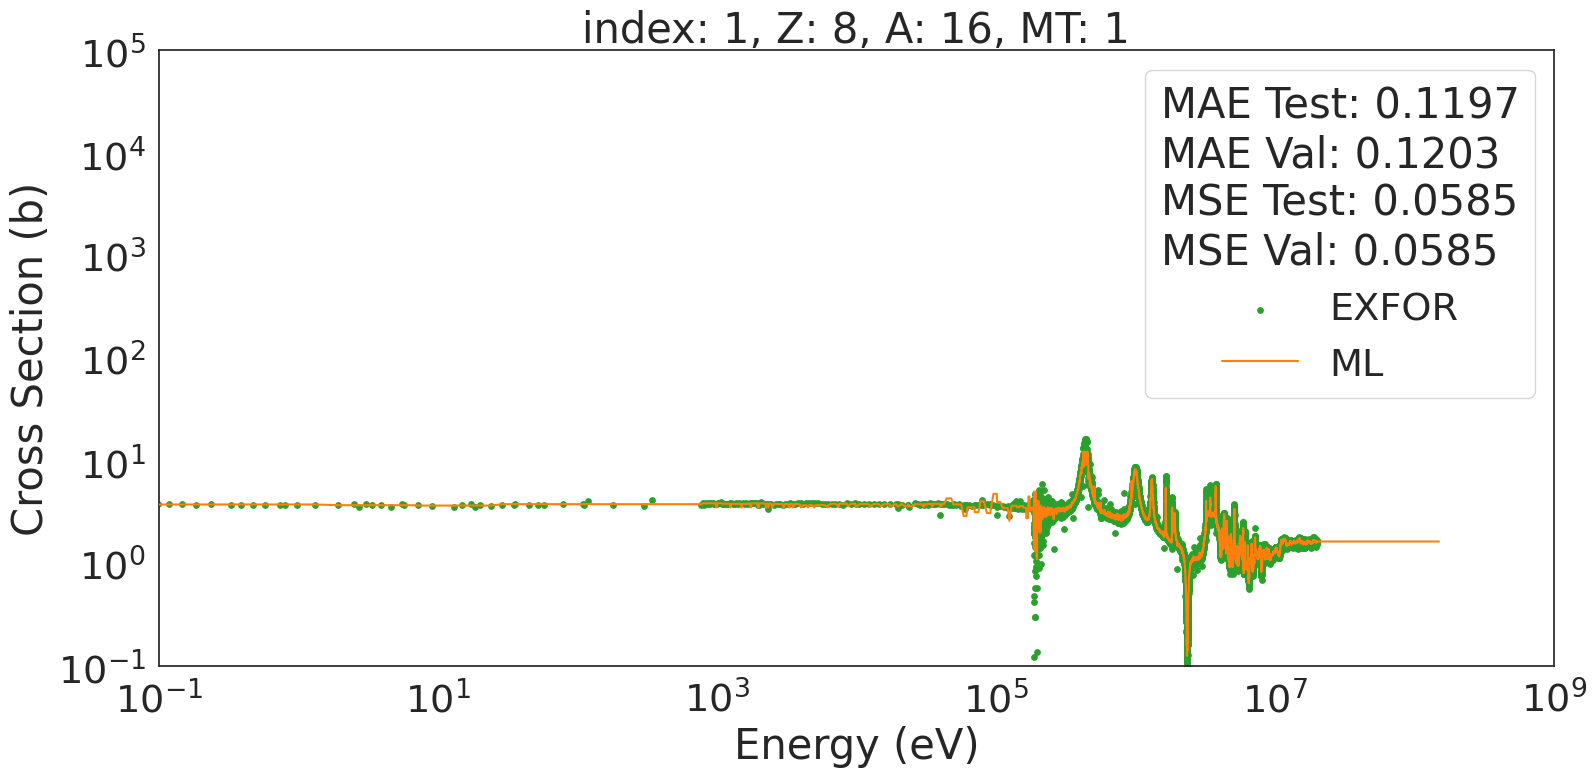

Index 1: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
11,11,All_basic=3_neutrons,15,76,7,8,standard_scaler,0.097284,0.039708,0.946842,...,0.120353,0.058202,0.922348,0.922348,0.119921,0.058333,0.921749,0.921749,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


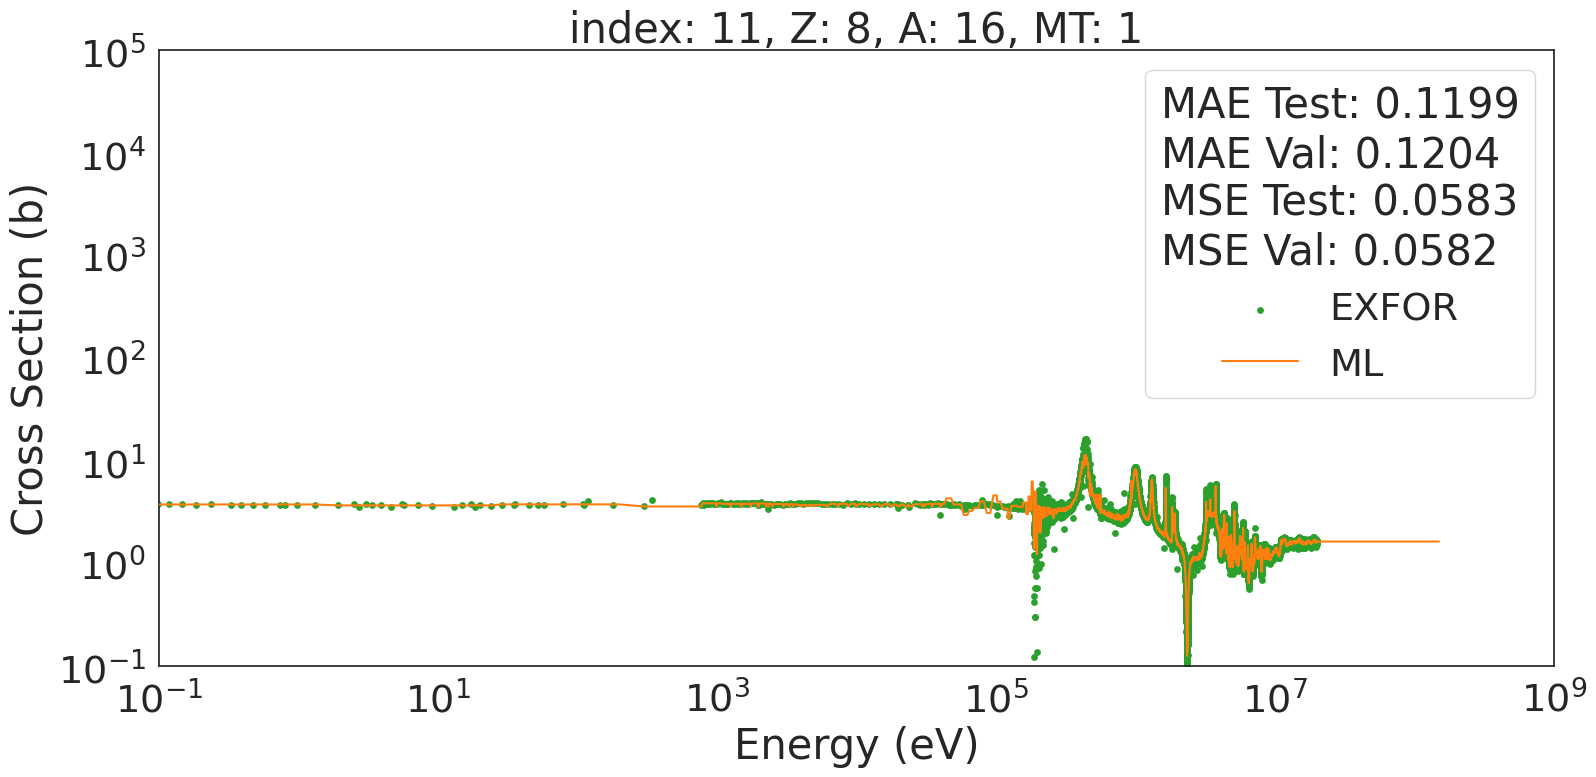

Index 11: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
21,21,All_basic=3_neutrons,23,82,7,7,standard_scaler,0.094819,0.038086,0.949124,...,0.120236,0.058508,0.922168,0.922168,0.119705,0.058466,0.921834,0.921834,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


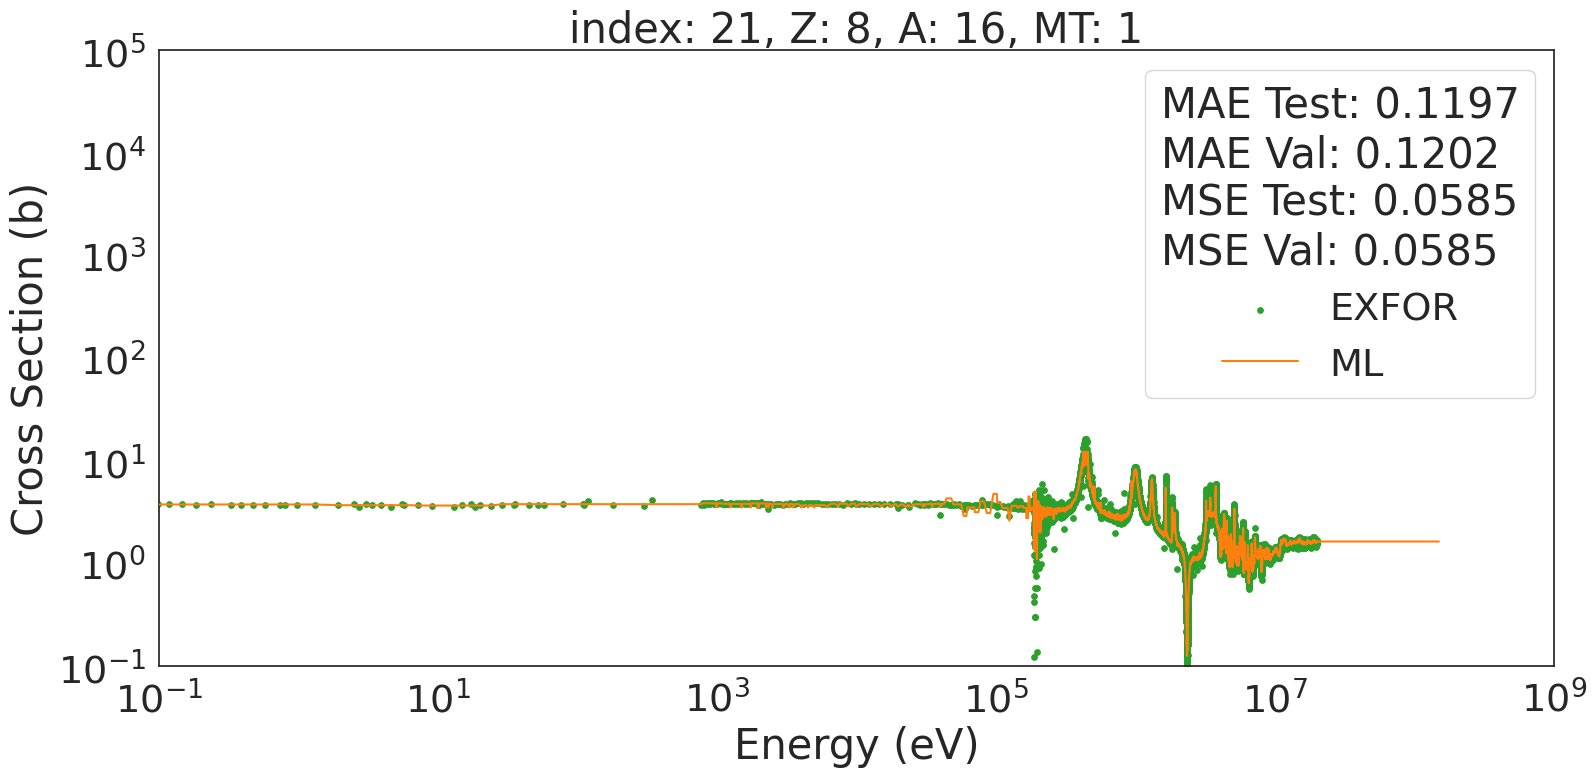

Index 21: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
31,31,All_basic=3_neutrons,31,88,7,6,standard_scaler,0.091852,0.036031,0.952001,...,0.119978,0.058492,0.922486,0.922485,0.119615,0.058748,0.92169,0.92169,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


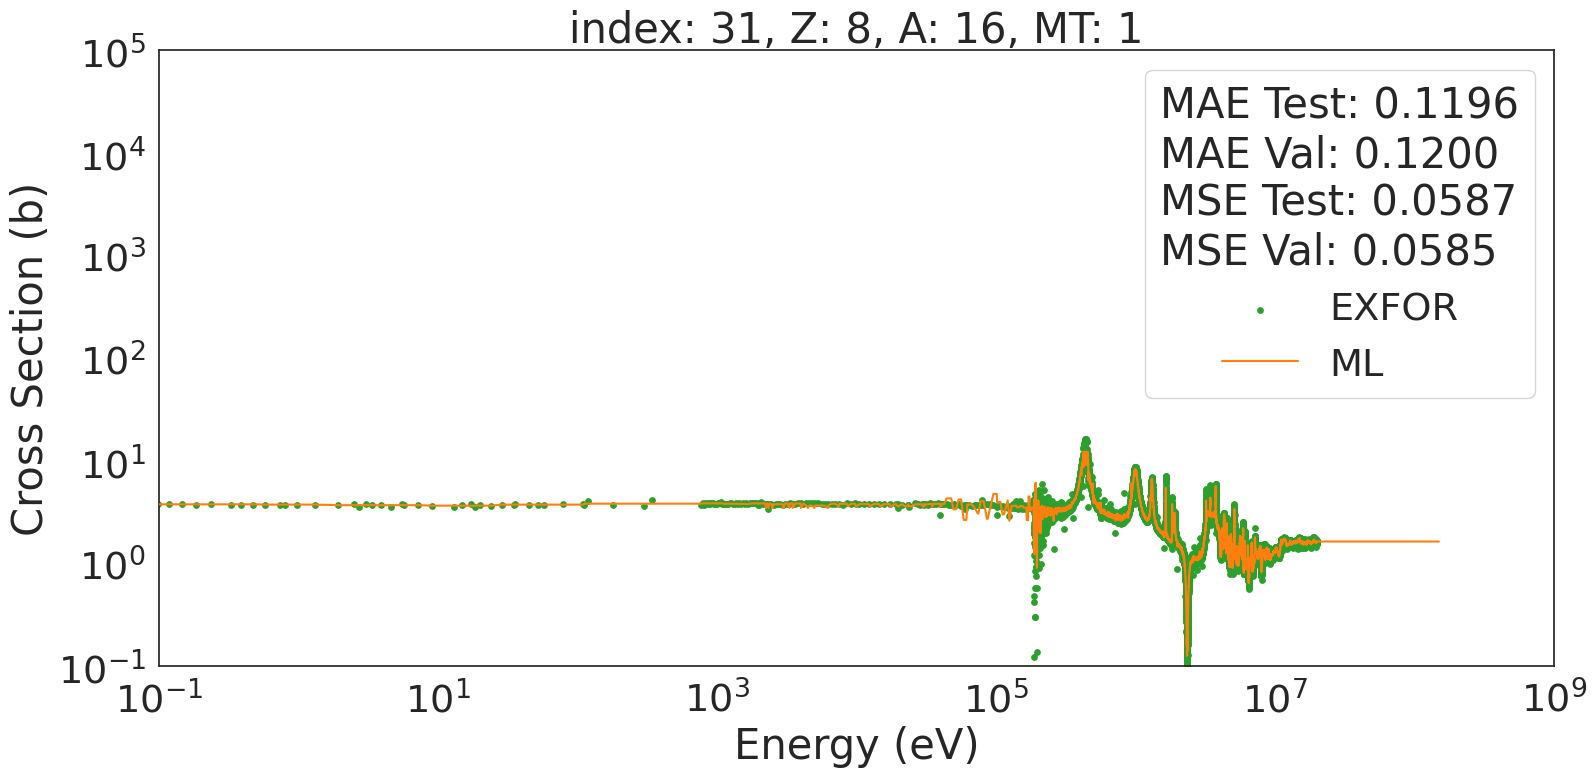

Index 31: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
41,41,LimitedRows=20000_basic=3_neutrons,6,70,7,8,standard_scaler,0.104559,0.045265,0.945464,...,0.130333,0.06764,0.918914,0.918914,0.130166,0.068137,0.917674,0.917674,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


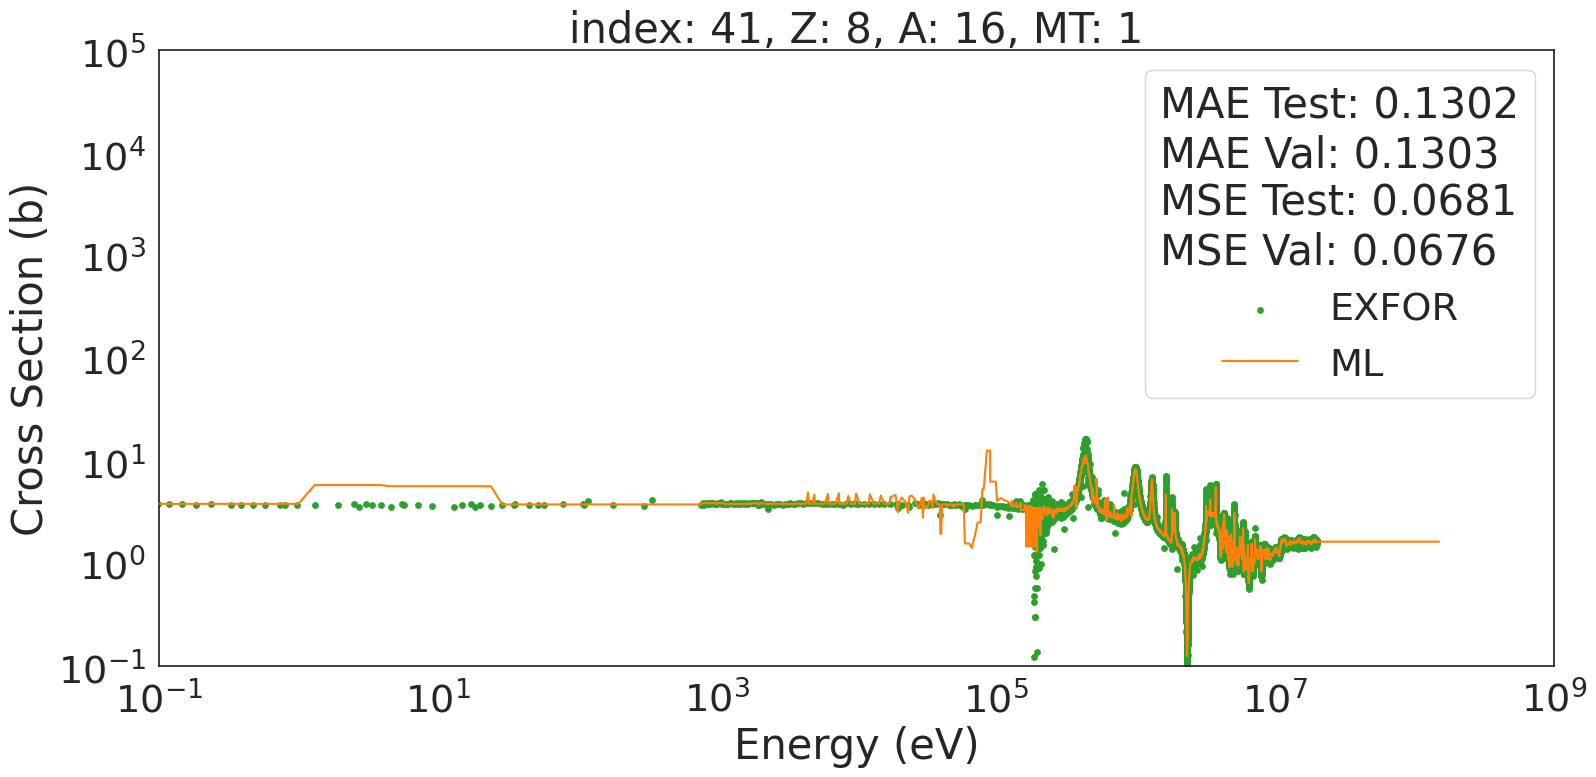

Index 41: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
51,51,LimitedRows=20000_basic=3_neutrons,11,76,6,7,standard_scaler,0.101056,0.042832,0.948547,...,0.129344,0.067195,0.919681,0.91968,0.129143,0.067785,0.918432,0.918432,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


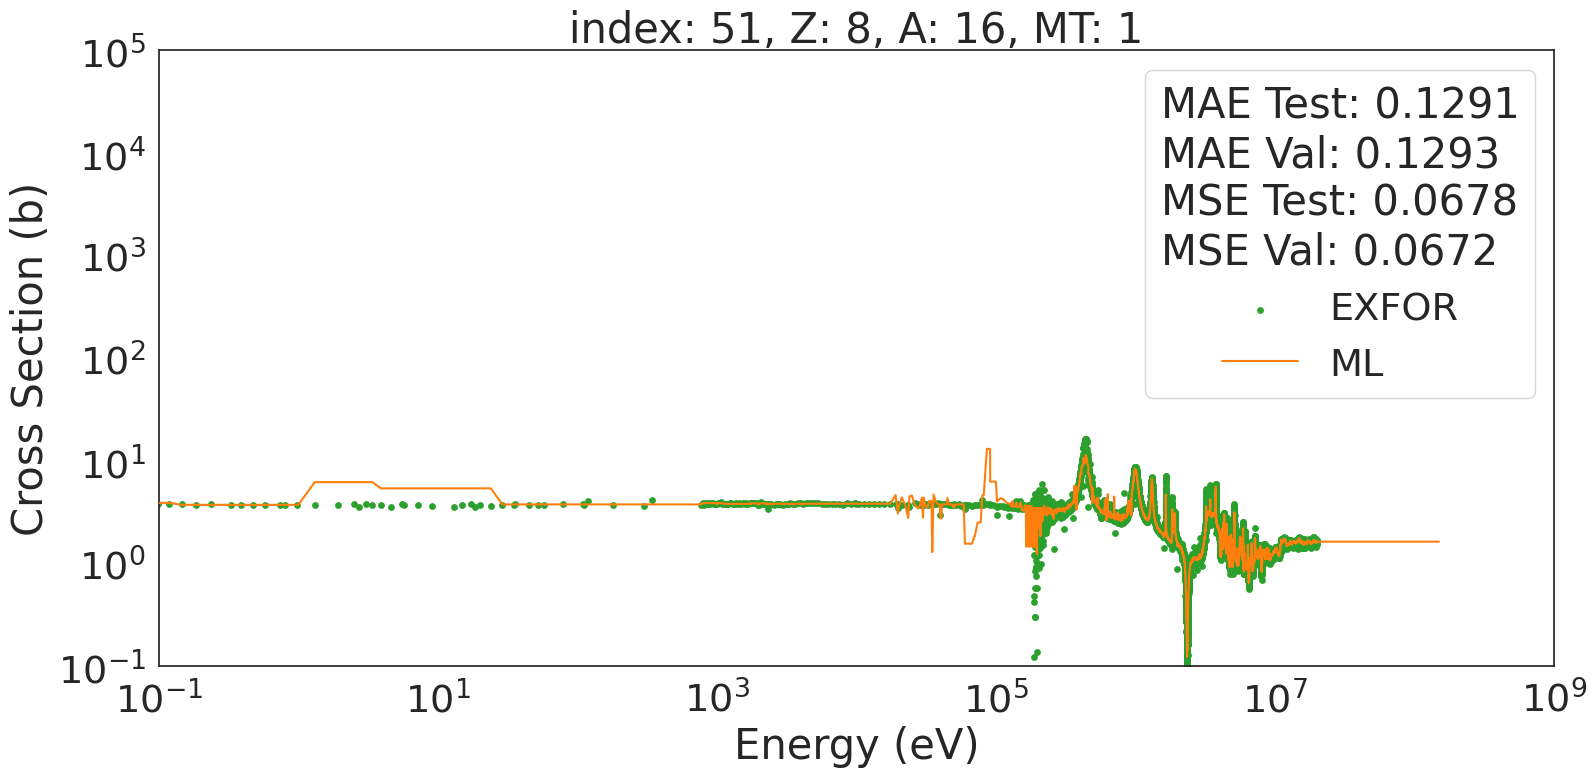

Index 51: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
61,61,LimitedRows=20000_basic=3_neutrons,19,82,6,6,standard_scaler,0.097018,0.039945,0.95218,...,0.128559,0.067257,0.920039,0.920038,0.128114,0.067292,0.919357,0.919357,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


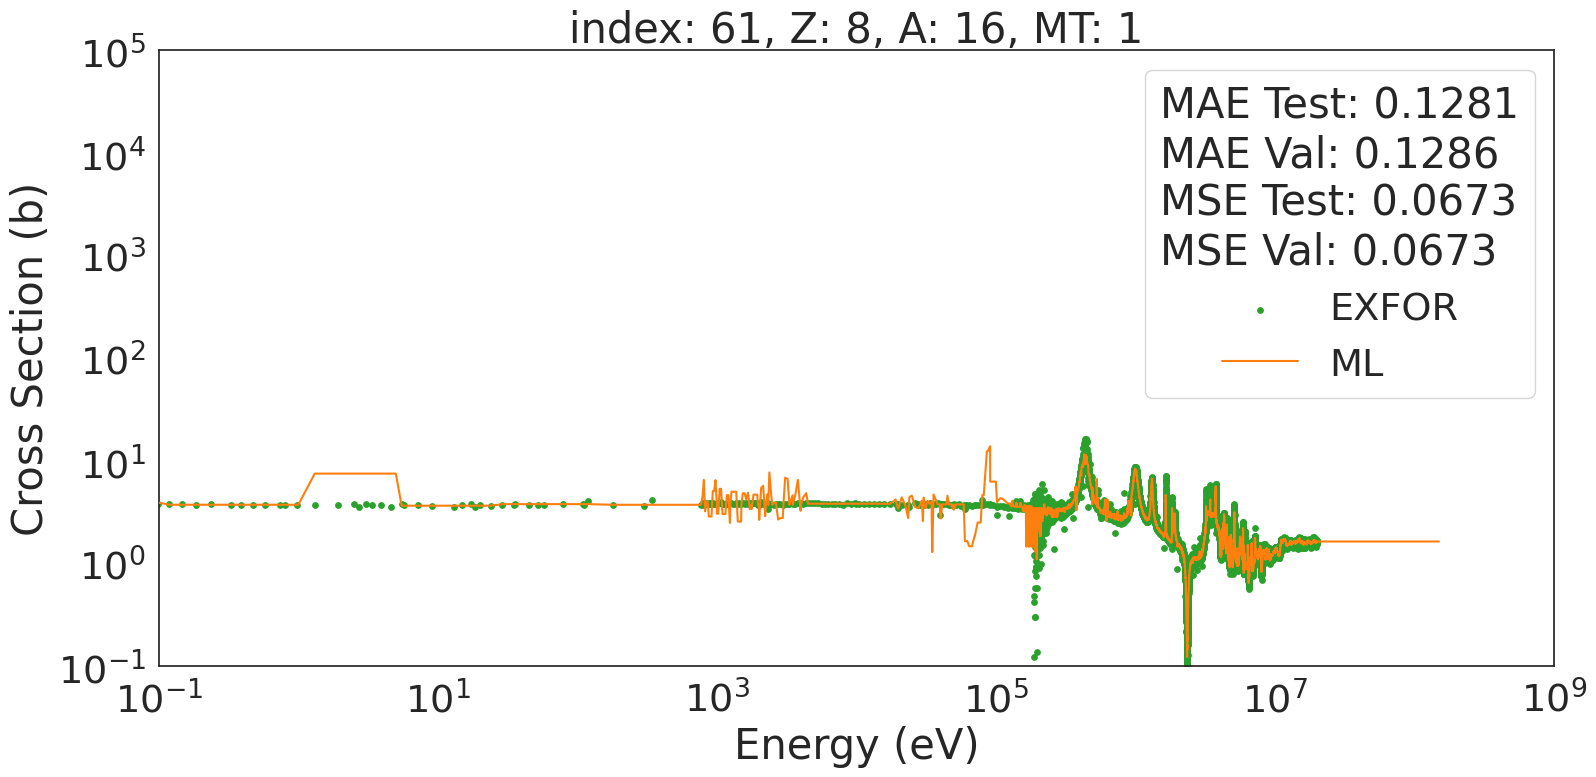

Index 61: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
71,71,LimitedRows=20000_basic=3_neutrons,36,88,8,8,standard_scaler,0.104555,0.045263,0.945467,...,0.130315,0.067599,0.918955,0.918955,0.130162,0.068146,0.917668,0.917668,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


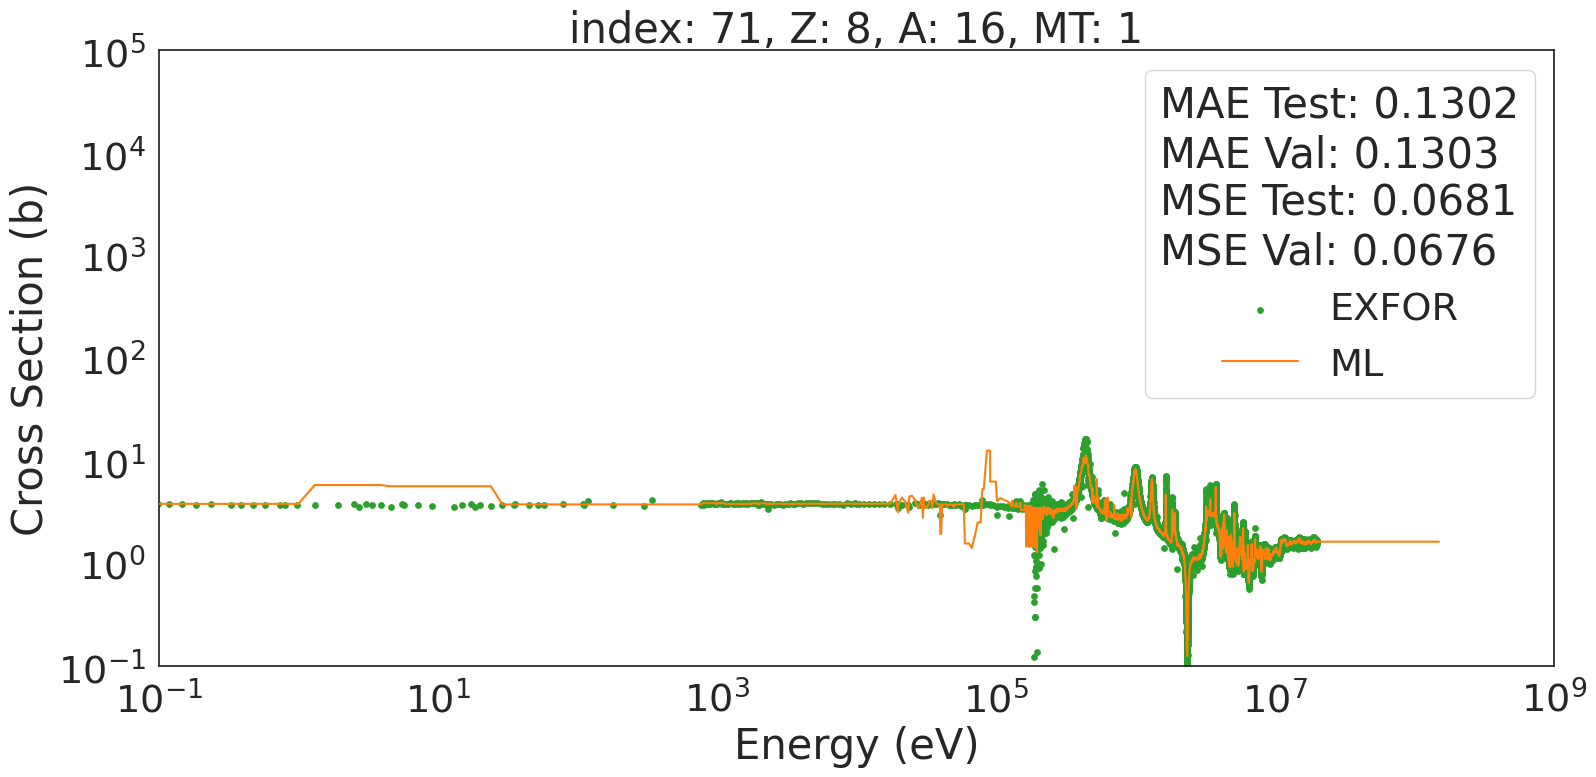

Index 71: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
81,81,Fraction=0.6_basic=3_neutrons,17,76,8,7,standard_scaler,0.553699,0.634328,-3.193283,...,0.681641,0.944947,-5.194502,-5.194512,0.676985,0.930633,-5.104409,-5.104412,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


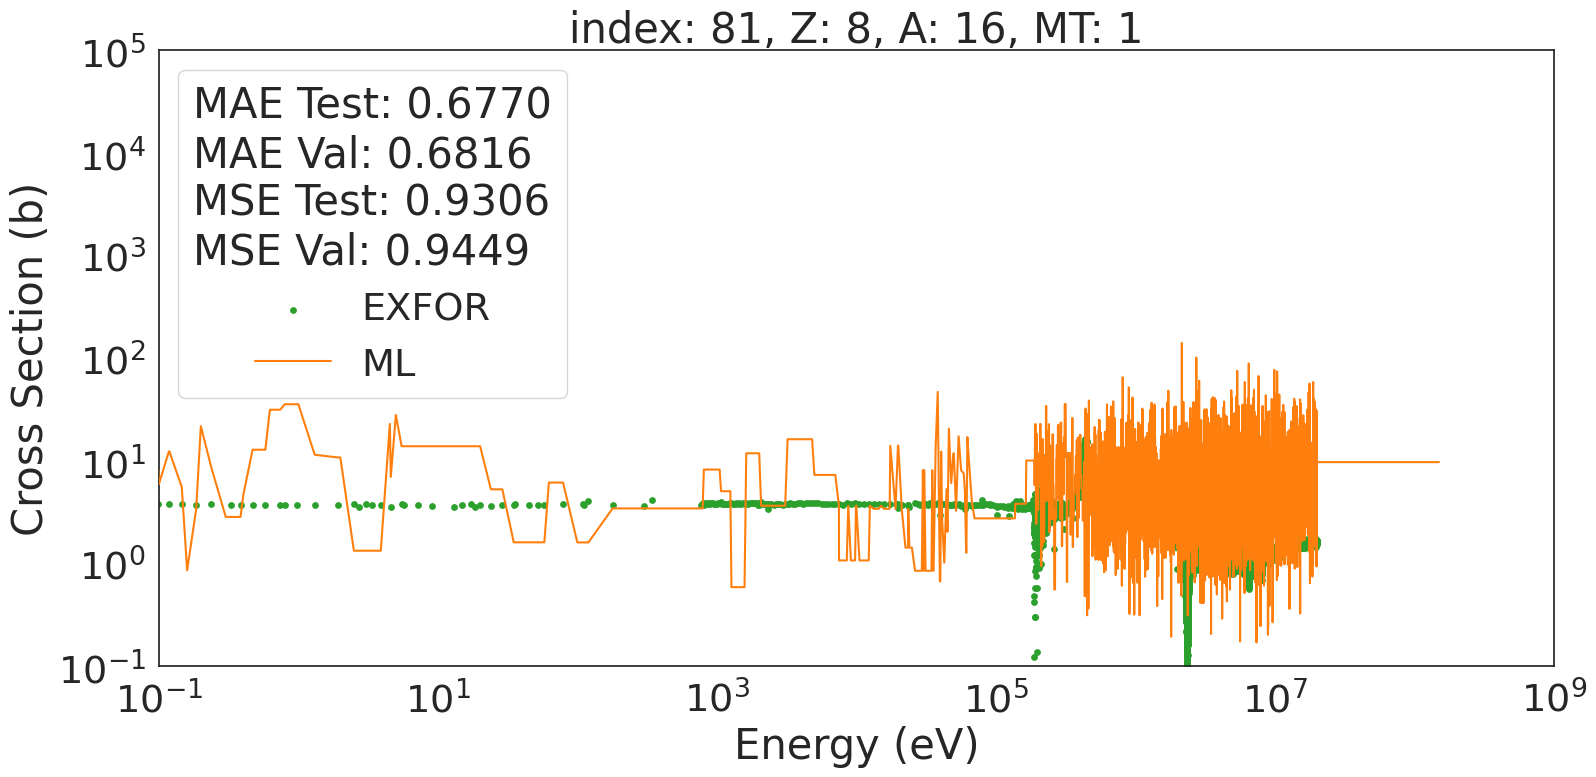

Index 81: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
91,91,Fraction=0.6_basic=3_neutrons,26,82,8,7,standard_scaler,0.551852,0.625198,-2.89769,...,0.687651,0.954416,-4.884556,-4.884572,0.682512,0.939101,-4.809734,-4.809735,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


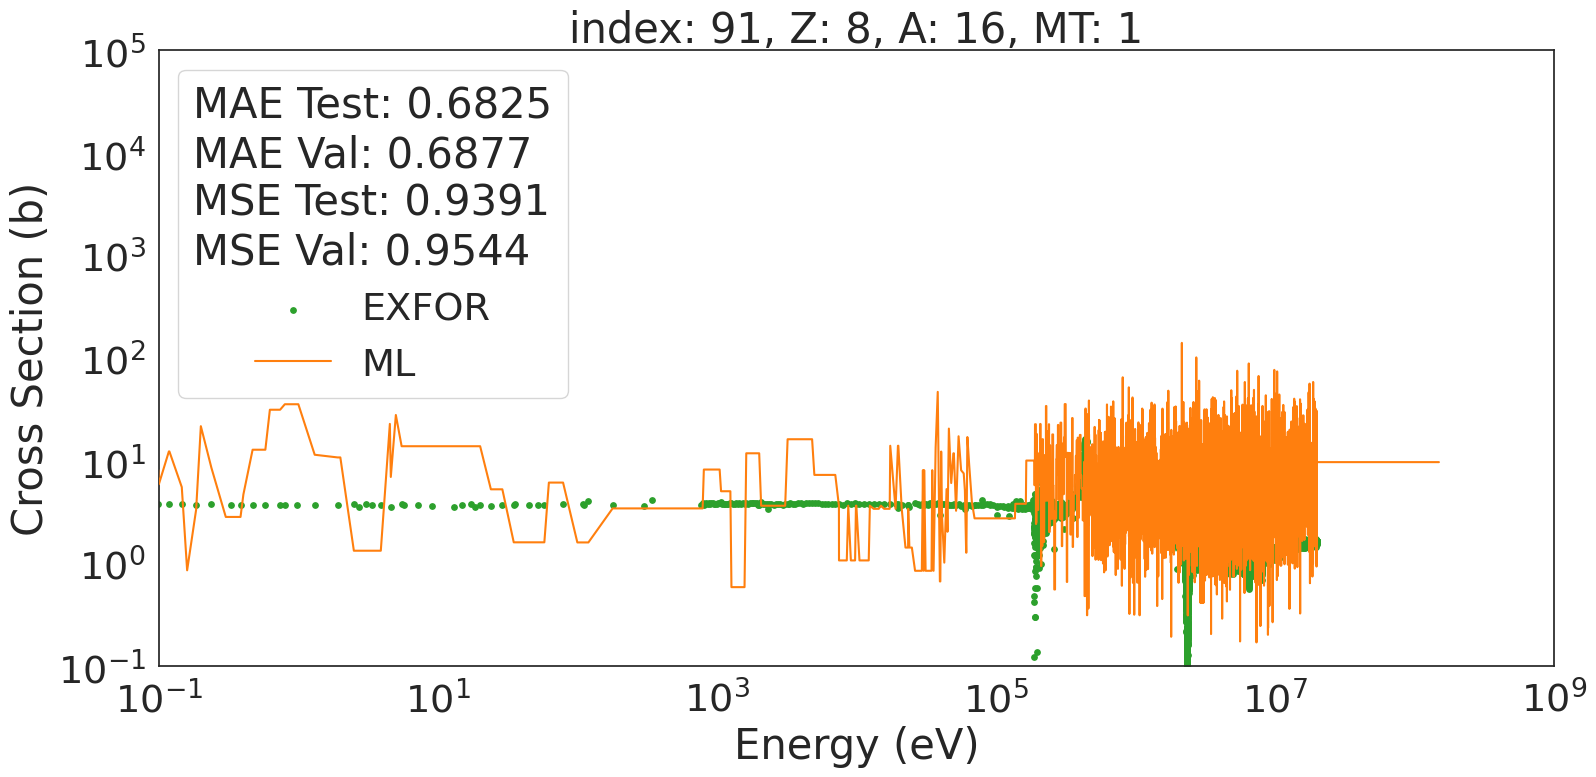

Index 91: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


,unique_index,source,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,...,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
101,101,Fraction=0.6_basic=3_neutrons,29,88,6,7,standard_scaler,0.550252,0.617087,-2.661968,...,0.693072,0.963052,-4.648899,-4.648924,0.687708,0.946784,-4.568216,-4.568218,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


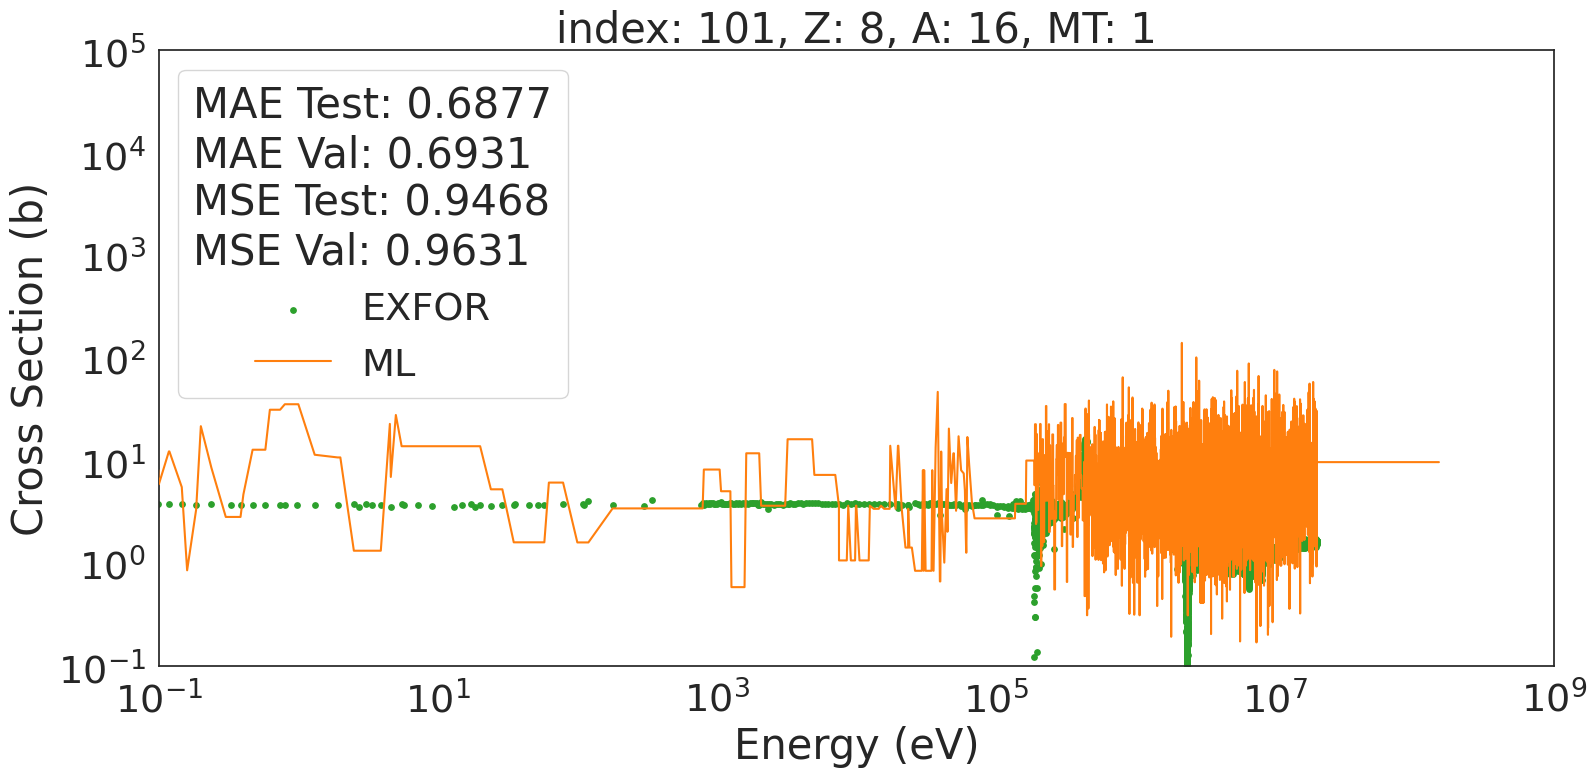

Index 101: dict_keys(['exfor_ml_expanded', 'exfor_ml_original', 'error_metrics'])


In [15]:
# Example usage
start = 1
stop = 108
step = 10
indexes = generate_indexes(start, stop, step)

def generate_plots_for_indexes(indexes, df, combined_df, model_date, base_directory, normalize=False):
    for index in indexes:
        # Load the model, scaler, and dataframe for the given index
        with suppress_stdout():
            model, scalerM, dfm = load_model_and_scaler_from_index(index, combined_df, model_date, base_directory)

        # Define all necessary inputs
        df = df  # Your DataFrame containing the experimental datapoints
        dfm = dfm # model
        Z = 8  # Example value for Uranium (U), set as needed
        A = 16  # Example mass number for Uranium isotope, set as needed
        MT = 1  # Example reaction channel, set as needed
        Normalize = True # generally set to true
        include_metrics_in_legend = True
        energy_range=(10e-2, 10e8)
        cross_section_range=(10e-2, 10e4)
        # Optional parameters
        order_dict = {"endf": 3, "exfor_ml_original": 4, "exfor_ml": 2, "exfor_new": 1}
        e_array = "ace"    # Energy grid or "ace" for ACE energy grid
        log = True         # Assuming the Energy is in log form, change as needed
        model_type = None  # Model type (None, "tf", "xgb")
        new_data = pd.DataFrame()  # Empty DataFrame as new data
        nat_iso = "N"      # "I" for isotopic, "N" for natural experimental campaigns
        get_endf = False   # Whether to extract the endf file for errors and plots
        show = True        # Whether to render a plot
        plotter = "plt"    # Plotting library ("plotly" or "plt")
        save = True       # Whether to save the plot
        # Ensure the directories exist
        save_dir = os.path.join(base_directory, model_date, 'figures')
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        path = os.path.join(save_dir, f"index: {index}, Z: {Z}, A: {A}, MT: {MT}.png")  # Path to save the plot, unique for each index
        save_both = False  # Whether to save both plotly and sns plots
        order_dict = {"endf": 3, "exfor_ml_original": 2, "exfor_ml": 4, "exfor_new": 1}  # Order of plotting lines

        # Insert the 'source' column into dfm and display the dfm table
        row = combined_df[combined_df['unique_index'] == index].iloc[0]
        dfm.insert(0, 'unique_index', row['unique_index'])
        dfm.insert(1, 'source', row['source'])  # Insert 'source' column as the first column
        display(dfm)

        # Create a title based on the contents of dfm
        title = f"index: {index}, Z: {Z}, A: {A}, MT: {MT}"

        # Default order_dict if not provided
        if order_dict is None:
            order_dict = {"endf": 3, "exfor_ml_original": 2, "exfor_ml": 4, "exfor_new": 1}

        # Call the appropriate prediction function
        with suppress_stdout():
            if normalize:
                result_dict = predicting_nuclear_xs_v2(
                    df, Z, A, MT, model, to_scale=to_scale, scaler=scalerM, e_array=e_array, log=log,
                    model_type=model_type, new_data=new_data, nat_iso=nat_iso, get_endf=get_endf, show=show,
                    plotter=plotter, save=save, path=path, save_both=False, order_dict=order_dict
                )
            else:
                result_dict = predicting_nuclear_xs_v2_no_norm_2(
                    df, Z, A, MT, model, e_array=e_array, log=log, model_type=model_type,
                    new_data=new_data, nat_iso=nat_iso, get_endf=get_endf, show=show, plotter=plotter,
                    save=save, path=path, save_both=False, order_dict=order_dict
                )

        # Add MAE and MSE metrics to legend if selected
        if include_metrics_in_legend:
            mae_test = row['test_mae']
            mae_val = row['val_mae']
            mse_test = row['test_mse']
            mse_val = row['val_mse']
            metrics_text = (f"MAE Test: {mae_test:.4f}\n"
                            f"MAE Val: {mae_val:.4f}\n"
                            f"MSE Test: {mse_test:.4f}\n"
                            f"MSE Val: {mse_val:.4f}")
            handles, labels = plt.gca().get_legend_handles_labels()
            plt.legend(handles, labels, title=metrics_text)


        # Set the title of the plot
        plt.title(title)

        # Set the energy range if specified
        if energy_range:
            plt.xlim(energy_range)

        # Set the cross-section range if specified
        if cross_section_range:
            plt.ylim(cross_section_range)

        # Save and show the plot
        plt.savefig(path)
        if show:
            plt.show()
        plt.close()

        # Display the result dictionary keys to understand what it contains
        print(f"Index {index}: {result_dict.keys()}")



# Assuming combined_df is the dataframe created previously
generate_plots_for_indexes(indexes, df, combined_df, model_date, base_directory, normalize=True)

In [ ]:
df.head()

,Energy,Data,Z,N,A,Atomic_Mass_Micro,Nucleus_Radius,Neutron_Nucleus_Radius_Ratio,MT_1,MT_101,...,MT_33,MT_4,MT_41,MT_51,MT_9000,MT_9001,Center_of_Mass_Flag_Center_of_Mass,Center_of_Mass_Flag_Lab,Element_Flag_I,Element_Flag_N
24,-3.744727,3.152288,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1
25,-3.455932,3.060698,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1
26,-3.229148,3.008600,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1
27,-3.107905,2.968483,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1
28,-2.920819,2.919078,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
print(to_scale)

['Z', 'N', 'A', 'Atomic_Mass_Micro', 'Nucleus_Radius', 'Neutron_Nucleus_Radius_Ratio']


#Correlation Matrix and Gini

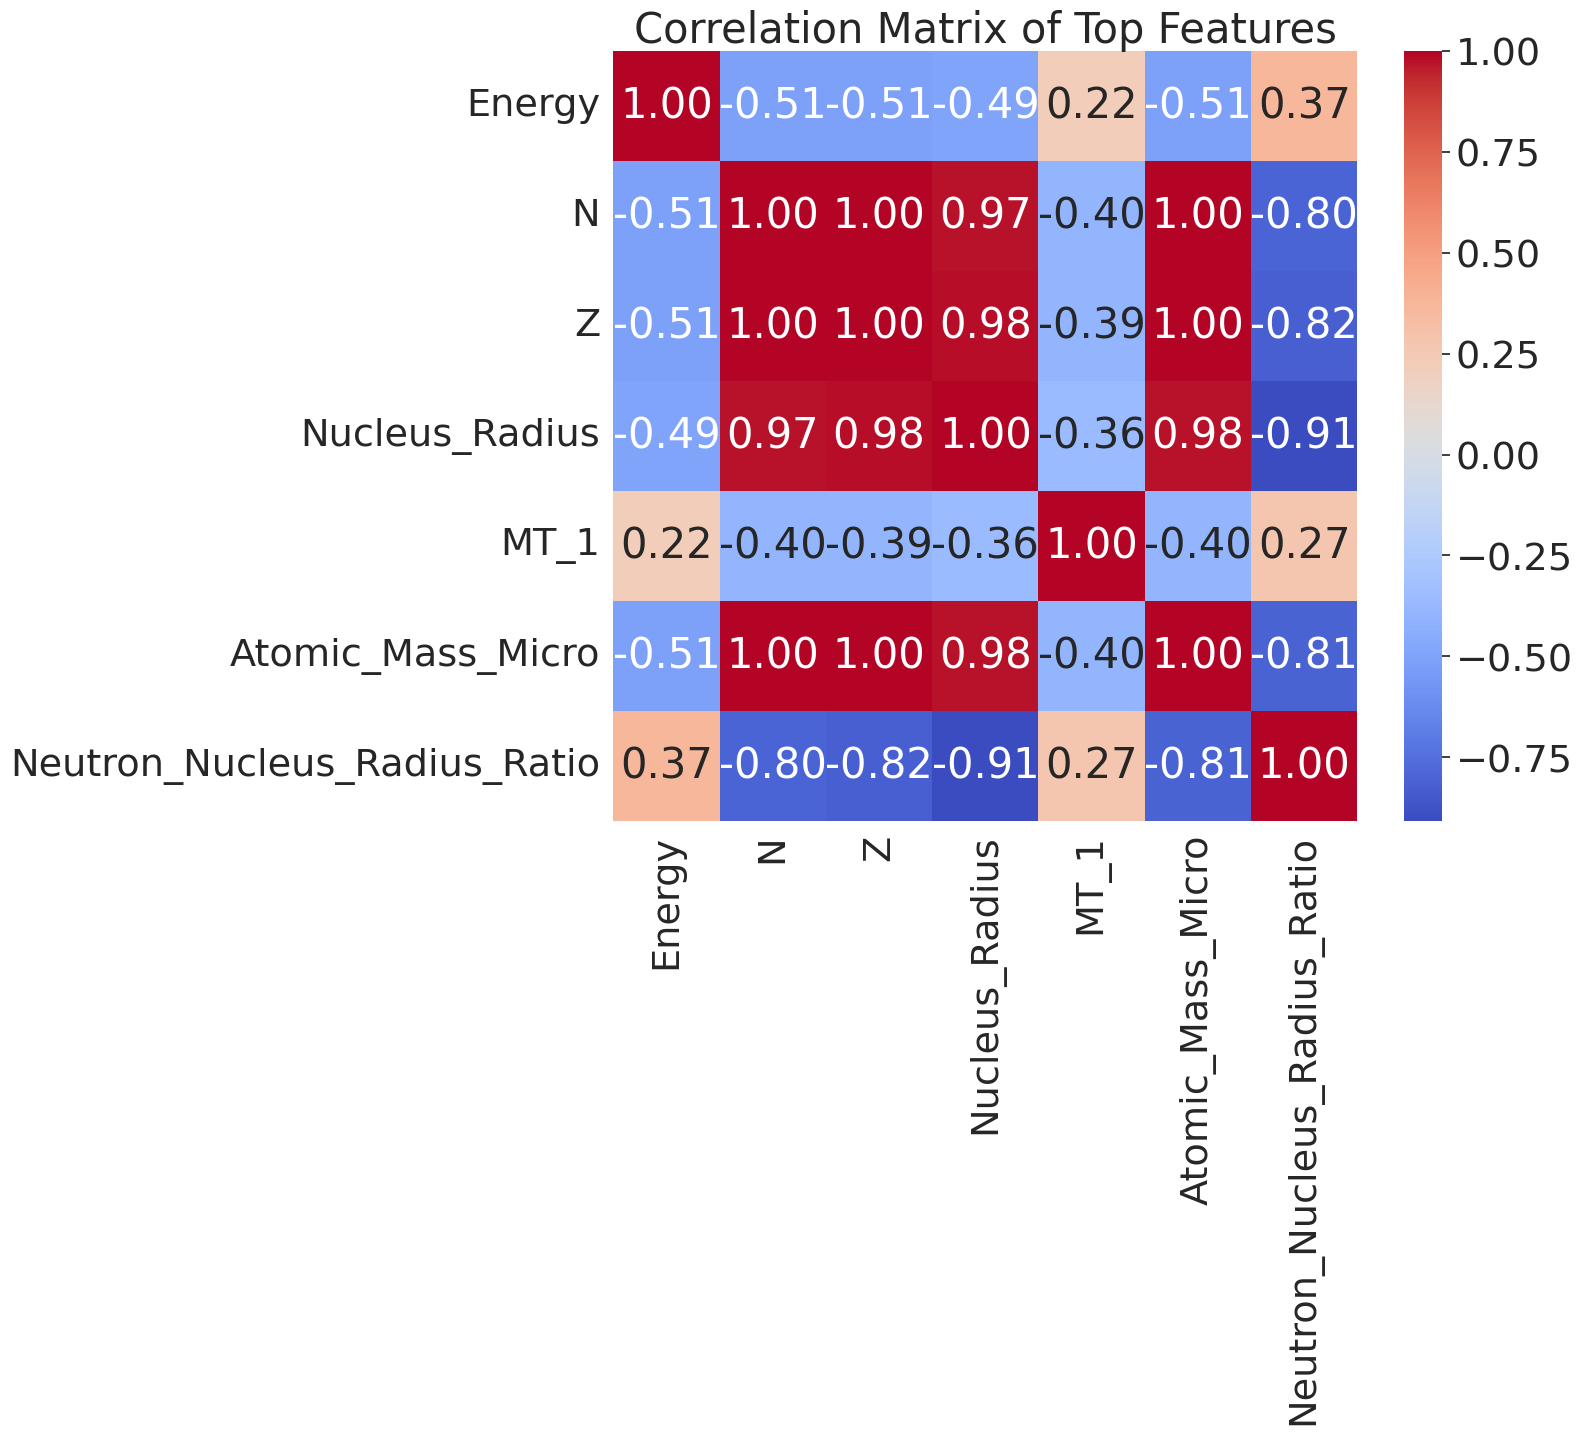

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top features based on Gini Importance (update this list with your actual top features)
top_features = [
    'Energy', 'N', 'Z', 'Nucleus_Radius', 'MT_1',
    'Atomic_Mass_Micro', 'Neutron_Nucleus_Radius_Ratio'
]

# Filter the DataFrame to include only the top features
df_top_features = df[top_features]

# Calculate the correlation matrix
correlation_matrix = df_top_features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Top Features')
plt.show()

In [ ]:
df.head(1)

,Energy,Data,Z,N,A,Atomic_Mass_Micro,Nucleus_Radius,Neutron_Nucleus_Radius_Ratio,MT_1,MT_101,...,MT_33,MT_4,MT_41,MT_51,MT_9000,MT_9001,Center_of_Mass_Flag_Center_of_Mass,Center_of_Mass_Flag_Lab,Element_Flag_I,Element_Flag_N
24,-3.744727,3.152288,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.columns

Index(['Energy', 'Data', 'Z', 'N', 'A', 'Atomic_Mass_Micro', 'Nucleus_Radius',
       'Neutron_Nucleus_Radius_Ratio', 'MT_1', 'MT_101', 'MT_102', 'MT_103',
       'MT_104', 'MT_105', 'MT_106', 'MT_107', 'MT_108', 'MT_111', 'MT_112',
       'MT_113', 'MT_155', 'MT_158', 'MT_159', 'MT_16', 'MT_17', 'MT_18',
       'MT_2', 'MT_22', 'MT_24', 'MT_28', 'MT_29', 'MT_3', 'MT_32', 'MT_33',
       'MT_4', 'MT_41', 'MT_51', 'MT_9000', 'MT_9001',
       'Center_of_Mass_Flag_Center_of_Mass', 'Center_of_Mass_Flag_Lab',
       'Element_Flag_I', 'Element_Flag_N'],
      dtype='object')